In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.sparse import hstack

In [12]:
df = pd.read_csv("../Dataset/QK-video_subset_5M.csv")

print(df.dtypes)
df.head()

user_id            int64
item_id            int64
click              int64
follow             int64
like               int64
share              int64
video_category    object
watching_times     int64
gender             int64
age                int64
dtype: object


,user_id,item_id,click,follow,like,share,video_category,watching_times,gender,age
0,1,1,1,0,0,0,1,1,1,4
1,1,2,1,0,0,0,1,1,1,4
2,1,3,1,0,0,0,0,1,1,4
3,1,4,0,0,0,0,1,0,1,4
4,2,5,1,0,0,0,1,1,1,4


In [13]:
selected_columns = ['user_id', 'item_id', 'video_category', 'gender', 'age']
numeric_columns = ['watching_times']
target_column = 'click'

X_raw = df[selected_columns + numeric_columns]
y = df[target_column]


In [14]:
categorical_cols = ['user_id', 'item_id', 'video_category', 'gender', 'age']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
encoder.fit(X_raw[categorical_cols])

scaler = StandardScaler()
scaler.fit(X_raw[numeric_columns])


StandardScaler()

In [15]:
X_cat = encoder.transform(X_raw[categorical_cols])
X_num = scaler.transform(X_raw[numeric_columns])

X_final = hstack([X_cat, X_num])

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

print("Shape X_final:", X_final.shape)


Shape X_final: (5000000, 746672)


In [16]:
model = LogisticRegression(max_iter=1000, solver="saga", n_jobs=-1)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, n_jobs=-1, solver='saga')

In [17]:
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Precision:", precision_score(y_test, y_pred))
print("✅ Recall:", recall_score(y_test, y_pred))
print("✅ F1 Score:", f1_score(y_test, y_pred))

✅ Accuracy: 0.771283
✅ Precision: 0.8221407769875388
✅ Recall: 0.5302409256779549
✅ F1 Score: 0.6446888267835311


✅ Logistic Regression ROC AUC: 0.8417


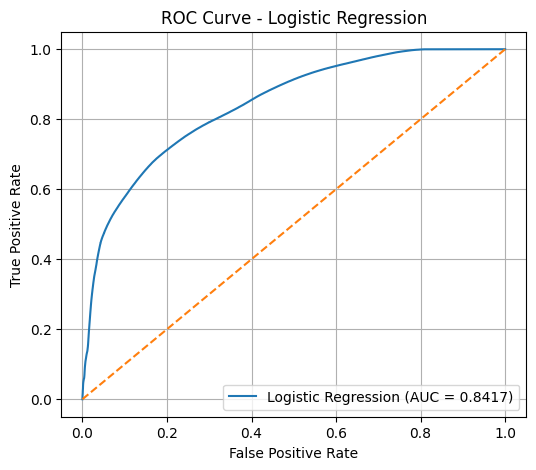

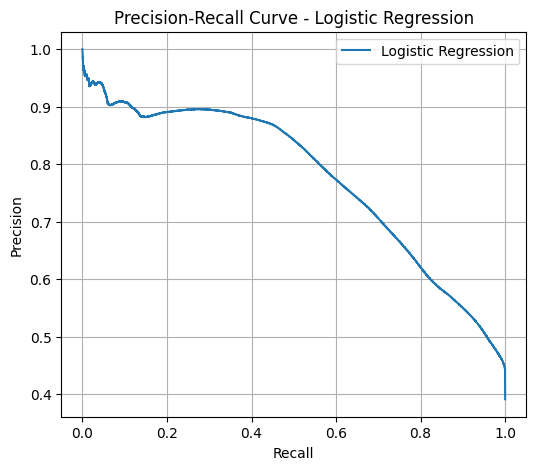

In [19]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

# Lấy xác suất dự đoán thay vì predict class
y_proba = model.predict_proba(X_test)[:, 1]

# ROC AUC
auc = roc_auc_score(y_test, y_proba)
print(f"✅ Logistic Regression ROC AUC: {auc:.4f}")

# Vẽ ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

# Vẽ Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label="Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
import joblib

joblib.dump(model, "logistic_model.pkl")
joblib.dump(encoder, "onehot_encoder.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Đã lưu model, encoder, scaler.")


✅ Đã lưu model, encoder, scaler.
